In [1]:
# Importing all packages and set plots/graphs to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the data

results = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [3]:
# Merge Datasets

df = pd.merge(results, races[['raceId','year','name','round']],on='raceId', how = 'left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']], on = 'driverId', how='left')
df = pd.merge(df, constructors[['constructorId','name','nationality']], on = 'constructorId', how='left')


In [4]:
# Drop Unnessasary Columns

df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'], axis=1, inplace = True)

df.head(3)

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British


In [5]:
# Rename Columns

df.rename(columns={'rank':'fastest_lap_rank','fastestLapSpeed':'fastest_lap_speed', 'name_x':'gp_name', 'nationality_x':'driver_nationality',
                'name_y':'constructor_name','nationality_y':'constructor_nationality', 'driverRef':'driver'}, inplace=True)

In [6]:
#Re-Arrange Columns

df = df[['year','gp_name','round','driver','constructor_name','grid','positionOrder','points',
        'time','milliseconds','fastest_lap_rank','fastestLapTime','fastest_lap_speed','driver_nationality','constructor_nationality']]

In [7]:
# Sort Values

df = df.sort_values(by=['year','round','positionOrder'], ascending=[False,True,True])

In [8]:
# Replace \N values in time column

df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastest_lap_speed.replace('\\N',np.nan,inplace=True)


C:\Users\parth\AppData\Local\Temp\ipykernel_16272\3971023717.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.time.replace('\\N',np.nan,inplace=True)
C:\Users\parth\AppData\Local\Temp\ipykernel_16272\3971023717.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [9]:
# Change Datatypes 

df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [10]:
# reset index

df.reset_index(drop=True, inplace=True)

In [11]:
# Shape

print(df.shape)

(26519, 15)


In [12]:
# Info
print(df.info)

<bound method DataFrame.info of        year             gp_name  round          driver constructor_name  grid  \
0      2024  Bahrain Grand Prix      1  max_verstappen         Red Bull     1   
1      2024  Bahrain Grand Prix      1           perez         Red Bull     5   
2      2024  Bahrain Grand Prix      1           sainz          Ferrari     4   
3      2024  Bahrain Grand Prix      1         leclerc          Ferrari     2   
4      2024  Bahrain Grand Prix      1         russell         Mercedes     3   
...     ...                 ...    ...             ...              ...   ...   
26514  1950  Italian Grand Prix      7          sanesi       Alfa Romeo     4   
26515  1950  Italian Grand Prix      7          manzon            Simca    10   
26516  1950  Italian Grand Prix      7            bira         Maserati    15   
26517  1950  Italian Grand Prix      7         pietsch         Maserati    27   
26518  1950  Italian Grand Prix      7         bonetto           Milano    23

In [13]:
# head 
print(df.head(5))

   year             gp_name  round          driver constructor_name  grid  \
0  2024  Bahrain Grand Prix      1  max_verstappen         Red Bull     1   
1  2024  Bahrain Grand Prix      1           perez         Red Bull     5   
2  2024  Bahrain Grand Prix      1           sainz          Ferrari     4   
3  2024  Bahrain Grand Prix      1         leclerc          Ferrari     2   
4  2024  Bahrain Grand Prix      1         russell         Mercedes     3   

   positionOrder  points         time  milliseconds  fastest_lap_rank  \
0              1    26.0  1:31:44.742     5504742.0               1.0   
1              2    18.0      +22.457     5527199.0               4.0   
2              3    15.0      +25.110     5529852.0               6.0   
3              4    12.0      +39.669     5544411.0               2.0   
4              5    10.0      +46.788     5551530.0              12.0   

  fastestLapTime fastest_lap_speed driver_nationality constructor_nationality  
0       1:32.608  

In [14]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

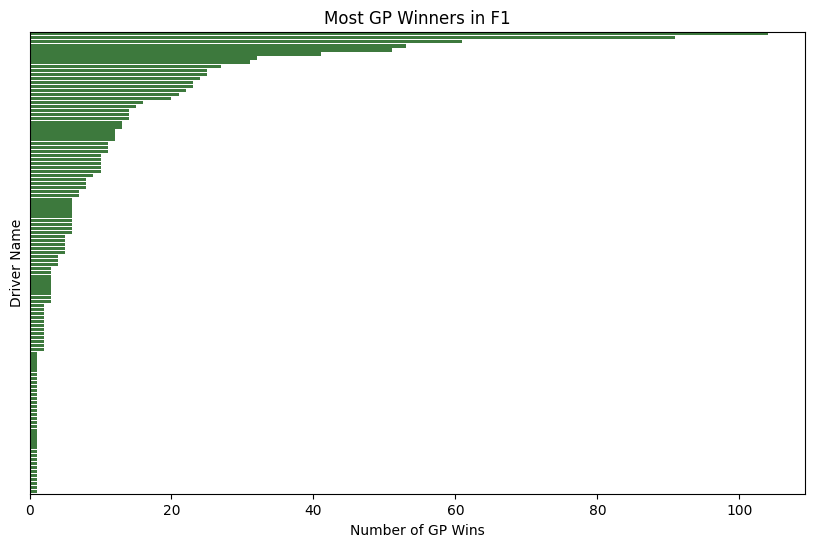

In [15]:
# GP Winners
# finding out all the drivers who are participated and won the GP
driver_winner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# BarPlot

sb.barplot(data=driver_winner,y='driver',x='positionOrder',color='darkgreen',alpha=0.8)
plt.title("Most GP Winners in F1")
plt.ylabel("Driver Name")
plt.xlabel("Number of GP Wins")
plt.yticks([])

In [16]:
# Create new dataframe of top 10 GP winners

top10Drivers = driver_winner.head(10)
print(top10Drivers)

               driver  positionOrder
0            hamilton            104
1  michael_schumacher             91
2      max_verstappen             61
3              vettel             53
4               prost             51
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


Text(0.5, 0, 'Number of GP Wins')

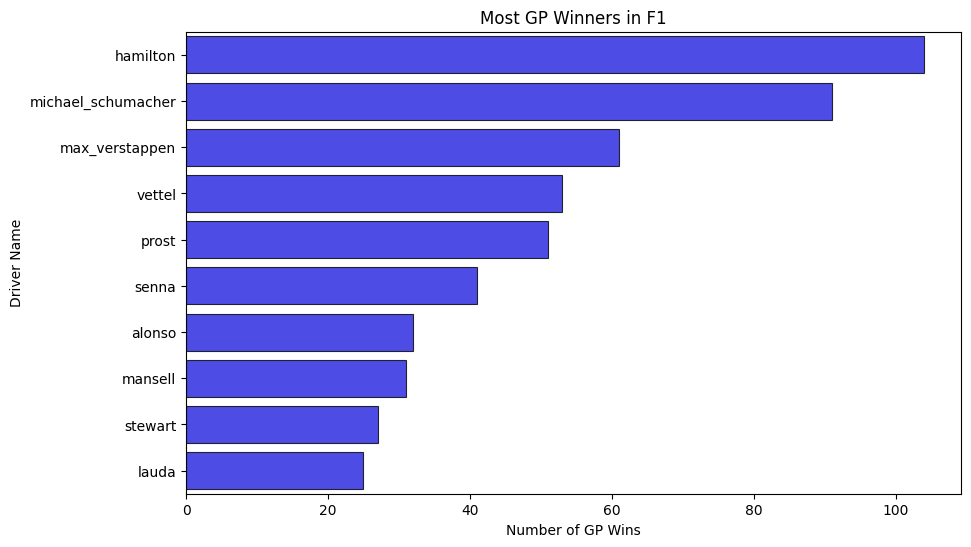

In [17]:
# Top 10 drivers Bar-plot

sb.barplot(data = top10Drivers, y='driver', x='positionOrder', color='blue', alpha=0.8, linewidth=.8, edgecolor='black')
plt.title("Most GP Winners in F1")
plt.ylabel("Driver Name")
plt.xlabel("Number of GP Wins")

<function matplotlib.pyplot.yticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

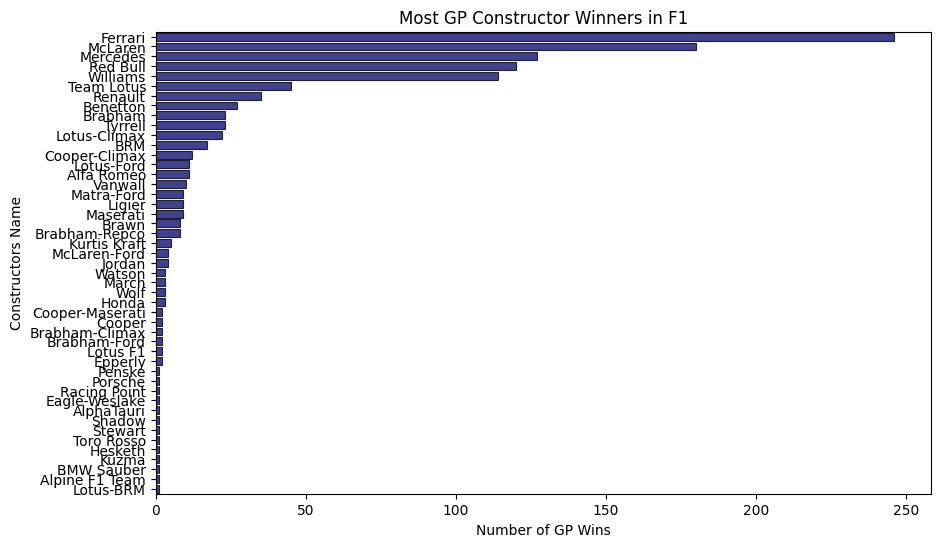

In [18]:
# GP Constructor Winners

constructor_winner = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

# Creating Bar-Plot

sb.barplot(data = constructor_winner, y='constructor_name', x='positionOrder', color = 'darkblue', alpha = 0.8, linewidth=0.8, edgecolor='black')
plt.title('Most GP Constructor Winners in F1')
plt.ylabel("Constructors Name")
plt.xlabel("Number of GP Wins")
plt.yticks

In [19]:
# Top 10 GP Constructor Winners in Formula-1

top10Constructors = constructor_winner.head(10)
print(top10Constructors)

  constructor_name  positionOrder
0          Ferrari            246
1          McLaren            180
2         Mercedes            127
3         Red Bull            120
4         Williams            114
5       Team Lotus             45
6          Renault             35
7         Benetton             27
8          Brabham             23
9          Tyrrell             23


Text(0.5, 0, 'Number of GP Wins')

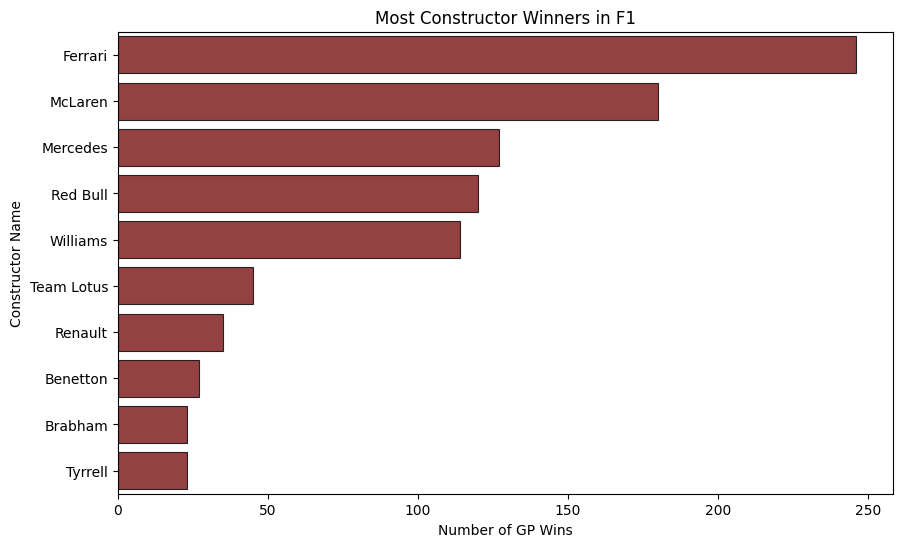

In [20]:
# Bar-plot of top 10 Constructor Winners

sb.barplot(data = top10Constructors, y='constructor_name', x='positionOrder', color='darkred', alpha=0.8, linewidth=.8, edgecolor='black')
plt.title("Most Constructor Winners in F1")
plt.ylabel("Constructor Name")
plt.xlabel("Number of GP Wins")

Text(0.5, 0, 'Starting Position')

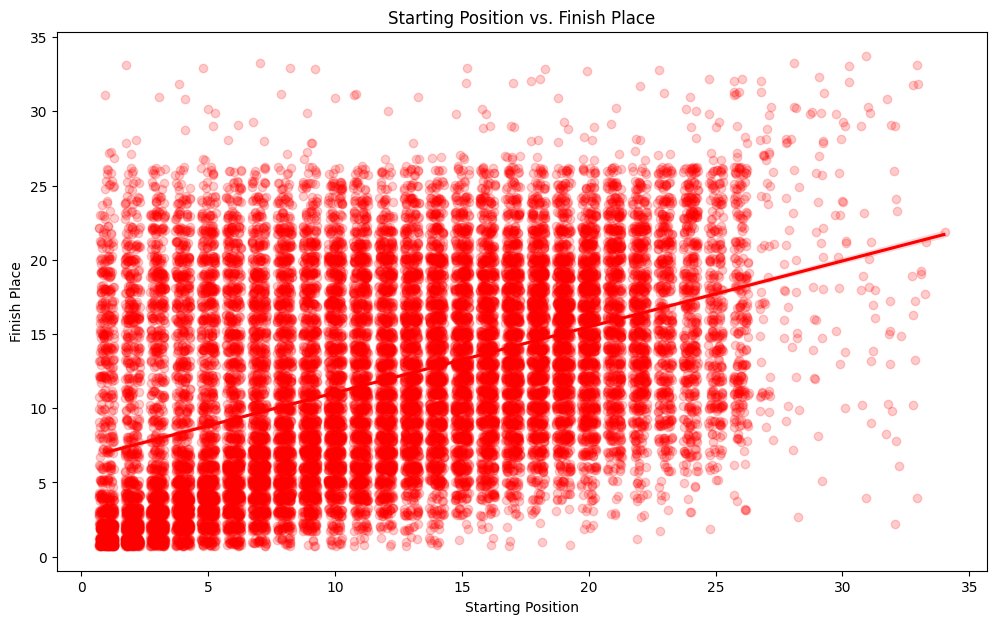

In [21]:
df_no_zero = df[df['grid'] != 0]

#Create a Regression-plot

plt.figure(figsize=[12,7])

sb.regplot(data=df_no_zero, x ='grid', y='positionOrder', color='red', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/5})
plt.title("Starting Position vs. Finish Place")
plt.ylabel("Finish Place")
plt.xlabel("Starting Position")

In [22]:
# Create new data frame for seasons 1990 and onwards

df_speed = df[df['year'] >= 1990]
df_group_speed = df_speed.groupby(['gp_name','year'])['fastest_lap_speed'].mean().to_frame().reset_index()

# Create a facetgrid

g = sb.FacetGrid(data=df_group_speed, col = 'gp_name', col_wrap=5)
g.map(plt.scatter, 'year', 'fastest_lap_speed', alpha = 0.8, linewidth = .8, edgecolor="black", s = 100)
g.set_titles("{col_name}")
g.set_axis_labels('Year', 'Average Fastest Lap Speed (mph)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');


# print(df['fastest_lap_speed'].dtype) 
# print(df['fastest_lap_speed'].unique())
# df['fastest_lap_speed'] = pd.to_numeric(df['fastest_lap_speed'], errors='coerce')
# print(df['fastest_lap_speed'].isna().sum())
# # df = df.dropna(subset=['fastest_lap_speed'])
# df['fastest_lap_speed'] = df['fastest_lap_speed'].fillna(df['fastest_lap_speed'].mean())

TypeError: agg function failed [how->mean,dtype->object]